In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, ToPILImage

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
class test:
  def __init__(self, data):
      self.data = data
  
  def __len__(self,):
      #вызывается в момент len(экземпляр класса test)
      return len(self.data)

  def __getitem__(self, key):
  #   #вызывается в момент экземпляр класса test [index]
      return self.data[key]

a = [1,2,3,4,5]
check = test(a)
check[2]

3

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
image, label = test_data[5]
label

1

In [ ]:
image = ToPILImage(mode='L')(image)

In [ ]:
from matplotlib import pyplot as plt

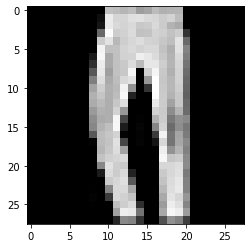

In [ ]:
plt.imshow(image, cmap = 'gray')

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.Sigmoid(),
            nn.Linear(1024, 512),
            nn.Sigmoid(),
            nn.Linear(512, 512),
            nn.Sigmoid(),
            nn.Linear(512, 10)
        )
    #предсказание
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
for X, y in test_dataloader:
    X = X.to(device)
    y_pred = model(X)
    print(y_pred.shape)
    break

torch.Size([64, 10])


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.326626  [   64/60000]
loss: 0.853368  [ 6464/60000]
loss: 0.500170  [12864/60000]
loss: 0.693043  [19264/60000]
loss: 0.473690  [25664/60000]
loss: 0.442222  [32064/60000]
loss: 0.427252  [38464/60000]
loss: 0.541361  [44864/60000]
loss: 0.538829  [51264/60000]
loss: 0.554187  [57664/60000]
Test Error: 
 Accuracy: 82.0%, Avg loss: 0.480302 

Epoch 2
-------------------------------
loss: 0.316522  [   64/60000]
loss: 0.340423  [ 6464/60000]
loss: 0.322994  [12864/60000]
loss: 0.446588  [19264/60000]
loss: 0.442342  [25664/60000]
loss: 0.343374  [32064/60000]
loss: 0.279390  [38464/60000]
loss: 0.475081  [44864/60000]
loss: 0.413292  [51264/60000]
loss: 0.426863  [57664/60000]
Test Error: 
 Accuracy: 85.1%, Avg loss: 0.405165 

Epoch 3
-------------------------------
loss: 0.240938  [   64/60000]
loss: 0.287604  [ 6464/60000]
loss: 0.252573  [12864/60000]
loss: 0.299428  [19264/60000]
loss: 0.420671  [25664/60000]
loss: 0.353089  [32064/600

In [ ]:
img, label = test_data[5]
y = model(img)

In [ ]:
torch.argmax(y)

tensor(1)

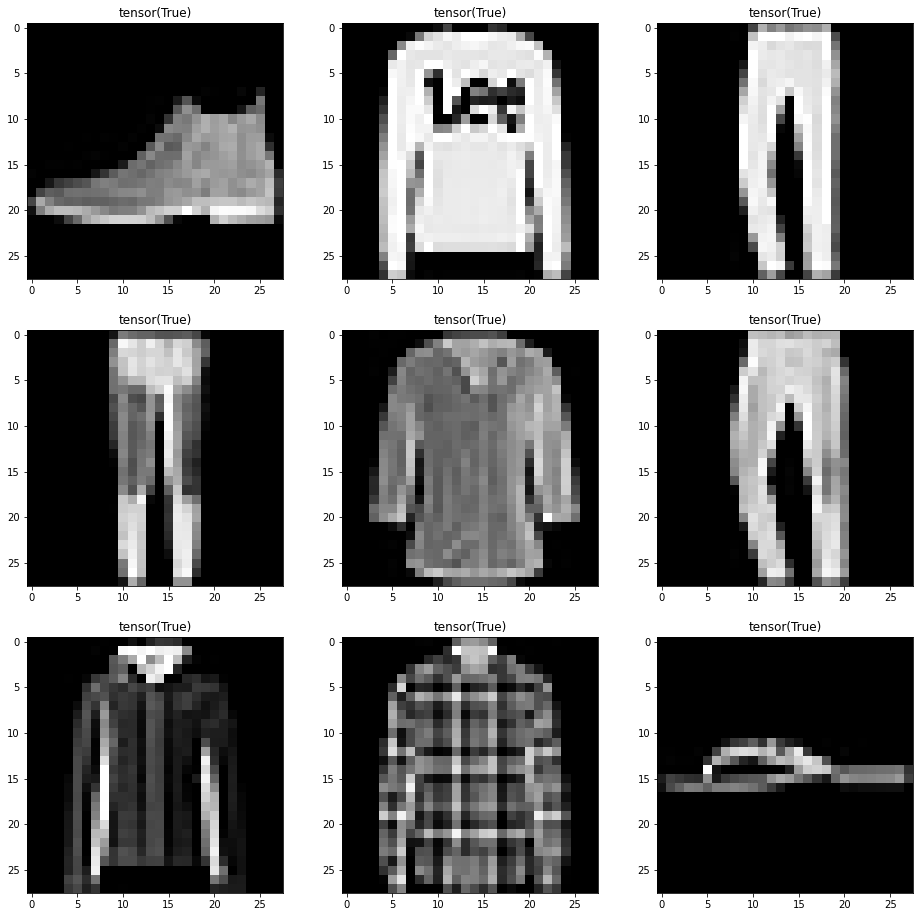

In [ ]:
def plot(model, testdataset, imgs = 9):
  fig = plt.figure(figsize=(16,16))
  for i in range(imgs):
      a = fig.add_subplot(3, 3, i + 1)
      image, label = testdataset[i]
      predict = torch.argmax(model(image))
      image = ToPILImage(mode='L')(image)
      plt.imshow(image, cmap = 'gray')
      a.set_title(str(predict == label))
  plt.show()
plot(model, test_data)